In [1]:
import numpy as np;import pandas as pd;import matplotlib.pyplot as plt;import seaborn as sns
housing=pd.read_csv(r'C:\Users\SONY\Desktop\NumPy\housing.data.txt',names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS',
                                                                       'RAD','TAX','PTRAIO','B','LSTAT','MEDV'],sep='\s+')
housing.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRAIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


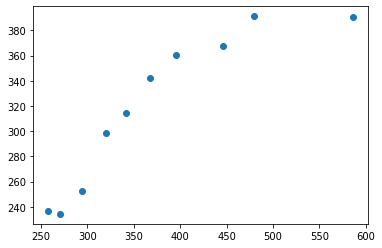

In [2]:
from sklearn.preprocessing import PolynomialFeatures
X = np.array([ 258.0, 270.0, 294.0, 320.0, 342.0,368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([ 236.4, 234.4, 252.8, 298.6, 314.2,342.2, 360.8, 368.0, 391.2, 390.8])[:, np.newaxis]
plt.scatter(X,y)


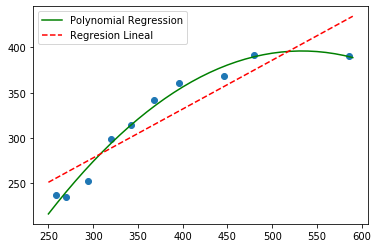

In [3]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr2=LinearRegression()
pol=PolynomialFeatures(degree=2)
lr.fit(X,y)
X_quad=pol.fit_transform(X)

X_test=np.arange(250,600,10)[:,np.newaxis]
y_pred_lr=lr.predict(X_test)[:,np.newaxis]
lr2.fit(X_quad,y)
y_pred_lr2=lr2.predict(pol.fit_transform(X_test))

plt.scatter(X,y)
plt.plot(X_test.ravel(),y_pred_lr2,c='green',label='Polynomial Regression')
plt.plot(X_test.ravel(),y_pred_lr.ravel(),linestyle='--',c='red',label='Regresion Lineal')
plt.legend()


In [4]:
from sklearn.metrics import r2_score
y_pred_l=lr.predict(X)
y_pred_p=lr2.predict(X_quad)

print(f'Lineal: {r2_score(y,y_pred_l)}   Poly: {r2_score(y,y_pred_p)}')

Lineal: 0.8317053837891232   Poly: 0.9818850241163604


##### Se obtiene un mejor adjuste cuando se le agregan características polinomiales al modelo de regresión lineal. 

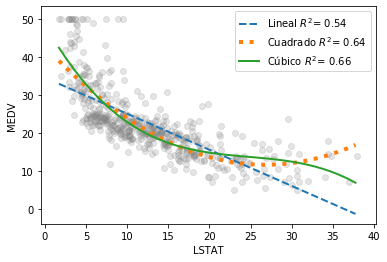

In [5]:
X = housing[['LSTAT']].values
y = housing['MEDV'].values
lr=LinearRegression()
unseen_data=np.arange(X.min(),X.max())[:,np.newaxis]
lr.fit(X,y)
y_lineal=lr.predict(unseen_data)
label=f'Lineal $R^2$= {r2_score(y,lr.predict(X)):.2f}'
plt.plot(unseen_data,y_lineal,label=label,lw=2,linestyle='--')
cuadrado=PolynomialFeatures(degree=2)
X_quad=cuadrado.fit_transform(X)
lr.fit(X_quad,y)
y_quad=lr.predict(cuadrado.fit_transform(unseen_data))
label=f'Cuadrado $R^2$= {r2_score(y,lr.predict(X_quad)):.2f}'
plt.plot(unseen_data,y_quad,label=label,lw=4,linestyle=':')
cubico=PolynomialFeatures(degree=3)
X_cubic=cubico.fit_transform(X)
lr.fit(X_cubic,y)
y_cubic=lr.predict(cubico.fit_transform(unseen_data))
label=f'Cúbico $R^2$= {r2_score(y,lr.predict(X_cubic)):.2f}'
plt.plot(unseen_data,y_cubic,label=label,lw=2,)
plt.scatter(X,y,color='gray',alpha=0.2)
plt.xlabel('LSTAT');plt.ylabel('MEDV')
plt.legend()




##### Se obtiene un mejor ajuste cuando la regresión lineal tiene características polinomiales de grado 3. Aunque aplicar características polinomiales puede mejorar el rendimiento del modelo, con frecuencia se obtienen mejores resultados si se consideran otros patrones. Por poner un ejemplo las dos variables también parecen tener una relación exponencial decreciente. 

# No relation líneal con Random Forest (Decision Tree Regression)

In [10]:
from sklearn.tree import DecisionTreeRegressor;from sklearn.model_selection import GridSearchCV
estimador=DecisionTreeRegressor()

grid=[{'max_depth':[1,2,4,5,6,7]}]

g=GridSearchCV(estimator=estimador,param_grid=grid,n_jobs=-1,cv=7)
g.fit(X,y)



GridSearchCV(cv=7, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'max_depth': [1, 2, 4, 5, 6, 7]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring

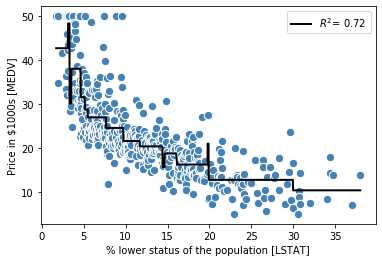

In [18]:
modelo=g.best_estimator_
modelo.fit(X,y)

def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2,label=f'$R^2$= {r2_score(y,modelo.predict(X)):.2f}')
    return None
from sklearn.metrics import r2_score

sort_idx = X.flatten().argsort()
lin_regplot(X[sort_idx], y[sort_idx], modelo)

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend()
plt.show()


##### Se observa que el árbol de decisión con una profundidad máxima de 4 se acopla bien a la tendencia de los datos. Se obtiene un coeficiente de determinación superior a cada uno de los obtenidos en las características polinomiales.

In [23]:
from sklearn.ensemble import RandomForestRegressor;from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
X=housing.iloc[:,:-1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=1)
g=[{'rft__n_estimators':np.arange(400,1000,200)}]
pipe=Pipeline([('rft',RandomForestRegressor(n_jobs=-1,random_state=1,criterion='mse'))])
grid=GridSearchCV(estimator=pipe,param_grid=g,cv=7,n_jobs=-1,)
grid.fit(X_train,y_train)




GridSearchCV(cv=7, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rft',
                                        RandomForestRegressor(bootstrap=True,
                                                              ccp_alpha=0.0,
                                                              criterion='mse',
                                                              max_depth=None,
                                                              max_features='auto',
                                                              max_leaf_nodes=None,
                                                              max_samples=None,
                                                              min_impurity_decrease=0.0,
                                                              min_impurity_split=None,
                                                              min_samples_leaf=1,
                                                        

In [24]:
modelo=grid.best_estimator_
modelo.fit(X_train,y_train)
y_pred_train=modelo.predict(X_train)
y_pred_test=modelo.predict(X_test)
print(f'Entrenamiento: {r2_score(y_train,y_pred_train):.2f}  Validación: {r2_score(y_test,y_pred_test):.2f}')


Entrenamiento: 0.98  Validación: 0.88


##### Hay evidencia de high variance en el modelo anterior. Sin embargo se obtiene una buena relación entre las variables independientes y la variable objetivo

# Residuos de la predicción

(-10, 50)

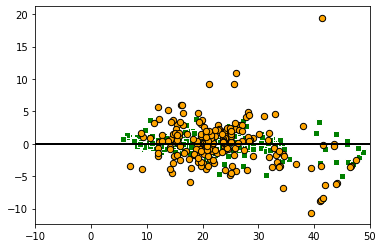

In [34]:
plt.scatter(y_pred_train,y_pred_train-y_train,color='green',marker='s',edgecolors='white',label='Datos de Entrenamiento',s=40)
plt.scatter(y_pred_test,y_pred_test-y_test,color='orange',marker='o',edgecolors='black', label='Datos de validación',s=40)
plt.hlines(y=0,xmin=-10,xmax=50,lw=2,color='black')
plt.xlim([-10,50])